In [1]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_21844/1272172356.py:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
date_parser = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock=pd.read_csv("^NSEI.csv",index_col='Date',parse_dates=['Date'],date_parser=date_parser).fillna(0)
stock.drop('Volume',inplace=True,axis=1)

In [3]:
stock.shape

(477, 5)

In [4]:
stock.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2009-08-03,4633.799805,4723.750000,4617.750000,4711.399902,4711.399902
2009-08-04,4706.250000,4731.450195,4642.600098,4680.500000,4680.500000
2009-08-05,4680.950195,4717.200195,4629.850098,4694.149902,4694.149902
2009-08-06,4694.350098,4718.149902,4559.200195,4585.500000,4585.500000
2009-08-07,4591.899902,4591.899902,4463.950195,4481.399902,4481.399902


In [5]:
ht=pp.ProfileReport(stock)

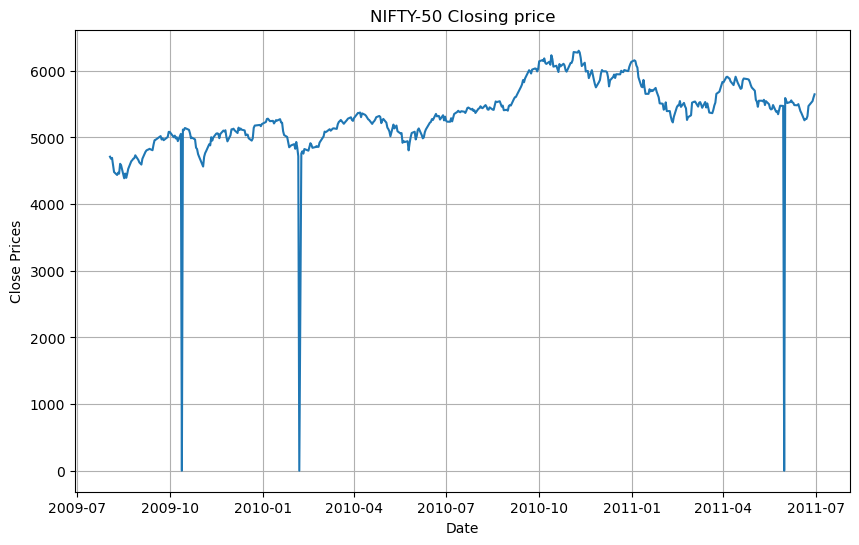

In [6]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock['Close'])
plt.title('NIFTY-50 Closing price')
plt.show()

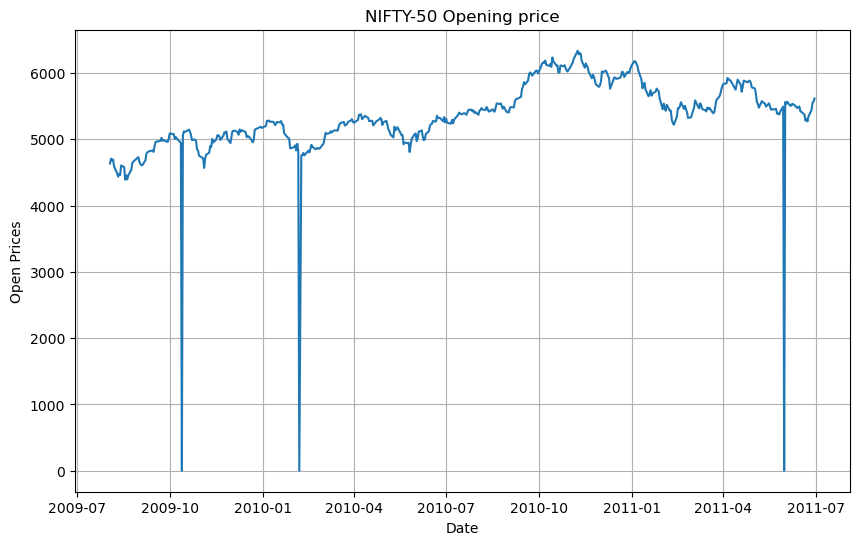

In [7]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Open Prices')
plt.plot(stock['Open'])
plt.title('NIFTY-50 Opening price')
plt.show()